# Quantum Teleportation Circuit

In [1]:
from qutip.qip.circuit import QubitCircuit, Measurement, Gate
from qutip import basis, tensor, identity
from math import sqrt
from qutip.qip import measurement

## Introduction 

This notebook introduces the basic quantum teleportation circuit (http://www.physics.udel.edu/~msafrono/425-2011/Lecture%2025-1.pdf), complete with measurements and classical control

We will describe the circuit that enables teleportation below. 

We will use two classical wires and three qubit wires. The first qubit wire represents the quantum state $| q0 ⟩ = | \psi ⟩$ that needs to be transferred from Alice to Bob (so the first qubit is in the posession of Alice). 

In [2]:
teleportation = QubitCircuit(3, num_cbits = 2, input_states = ["q0", "0", "0", "c0", "c1"])

First, Alice and Bob need to create the shared EPR pair ($\frac{| 00 ⟩ + | 11 ⟩} {2}$) between the second and third qubit by using the hadamard gate on Alice's qubit followed by an entangling CNOT gate.  

In [3]:
teleportation.add_gate("SNOT", targets=[1])
teleportation.add_gate("CNOT", targets=[2], controls=[1])

Following this, Alice interacts the qubit $| q0 ⟩$ with Alice's EPR qubit, followed by measuring on the two qubits belonging to Alice. The measurement results for the first qubit is stored in classical register $c0$ and the second qubit is stored in classical register $c1$.

In [4]:
teleportation.add_gate("CNOT", targets=[1], controls=[0])
teleportation.add_gate("SNOT", targets=[0])

teleportation.add_measurement("M0", targets=[0], classical_store=0)
teleportation.add_measurement("M1", targets=[1], classical_store=1)

Now, we apply the $X$ gate on Bob's qubit based on the classical control $c0$ and $Z$ gate based on classical control $c1$. These operations correspond to the following operations based on the state of Alice's measurement. 

$|00⟩ \rightarrow $ no operation \
$|01⟩ \rightarrow Z$ \
$|10⟩ \rightarrow X$ \
$|11⟩ \rightarrow ZX$ 

The final circuit mathematically must result in the third qubit taking the state $|\psi⟩$. 

In [5]:
teleportation.add_gate("X", targets=[2], classical_controls=[0])
teleportation.add_gate("Z", targets=[2], classical_controls=[1])

Finally, our teleportation circuit is ready to run, we can view the circuit structure using the following command. 

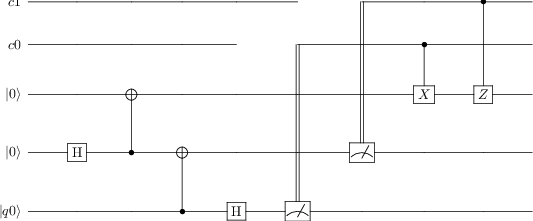

In [6]:
teleportation.png

The first qubit is user-specified $|q0 ⟩ = |\psi ⟩$ and the other two must be $|0⟩$. 

### Example 1 
#### $|q0 ⟩ = |+ ⟩$  

In [7]:
a = 1/sqrt(2) * basis(2, 0) + 1/sqrt(2) * basis(2, 1)
state = tensor(a, basis(2,0), basis(2,0))

We can confirm our state is initialized correctly by observing the measurment statistics on the first qubit, follwed by which we run the circuit.

In [8]:
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

([0.4999999999999999, 0.4999999999999999],
 [Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]])

We can run the circuit using the **QubitCircuit.run** function which provided the initial state-vector (or density matrix) initiates one run on the circuit (including sampling any intermediate measurements) and providing the final results (any classical bits can also be explicitly set using the argument **cbits**) 

In [9]:
state_final = teleportation.run(state)

After running, we can see the measurement statistics on the last qubit to see that the qubit is teleported correctly. 

In [10]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

([0.4999999999999999, 0.4999999999999999],
 [Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]])

### Example 2 
#### $|q0 ⟩ = |1 ⟩$  

In [11]:
state = tensor(basis(2,1), basis(2,0), basis(2,0))
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

([0.0, 1.0],
 [None,
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]])

In [12]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [13]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

([0.0, 1.0],
 [None,
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [1.]]])

Another useful feature of the circuit module is the **QubitCircuit.run_statistics()** feature which provides the opportunity to run the circuit an arbitrary number of times and groups the frequency of the output kets. Currently it only supports kets. The **num_runs** argument specifies the number of runs.

In [14]:
teleportation.run_statistics(state, num_runs=1024)

[[Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [-1.]
   [ 0.]
   [ 0.]
   [ 0.]], 270],
 [Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [0.]], 245],
 [Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [1.]], 254],
 [Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]], 255]]

Also available is the measurement_statistics function which allows to perform a quantum mechanical measurment on the final state vector.

In [15]:
measurement.measurement_statistics(tensor(identity(2), identity(2), identity(2)), state_final)

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2